In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns 
from scipy import stats 
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

df = pd.read_csv('C:/Users/k_gag/OneDrive/Desktop/Transport Analytics C/vehicle10.csv', encoding = 'latin-1')

In [2]:
df.columns

Index(['ï»¿DayNum', 'VehId', 'Trip', 'Timestamp(ms)', 'Latitude[deg]',
       'Longitude[deg]', 'Vehicle Speed[km/h]', 'MAF[g/sec]',
       'Engine RPM[RPM]', 'Absolute Load[%]', 'OAT[DegC]', 'Fuel Rate[L/hr]',
       'Air Conditioning Power[kW]', 'Air Conditioning Power[Watts]',
       'Heater Power[Watts]', 'HV Current [A]', 'HV Battery SOC[%]',
       'Power drained(kW)', 'HV Battery Voltage[V]',
       'Short Term Fuel Trim Bank 1[%]', 'Short Term Fuel Trim Bank 2[%]',
       'Long Term Fuel Trim Bank 1[%]', 'Long Term Fuel Trim Bank 2[%]'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66458 entries, 0 to 66457
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ï»¿DayNum                       66458 non-null  float64
 1   VehId                           66458 non-null  int64  
 2   Trip                            66458 non-null  int64  
 3   Timestamp(ms)                   66458 non-null  int64  
 4   Latitude[deg]                   66458 non-null  float64
 5   Longitude[deg]                  66458 non-null  float64
 6   Vehicle Speed[km/h]             66458 non-null  float64
 7   MAF[g/sec]                      0 non-null      float64
 8   Engine RPM[RPM]                 0 non-null      float64
 9   Absolute Load[%]                0 non-null      float64
 10  OAT[DegC]                       66458 non-null  float64
 11  Fuel Rate[L/hr]                 0 non-null      float64
 12  Air Conditioning Power[kW]      

In [4]:
#Checking_null_in_columns
df.isnull().sum()

ï»¿DayNum                             0
VehId                                 0
Trip                                  0
Timestamp(ms)                         0
Latitude[deg]                         0
Longitude[deg]                        0
Vehicle Speed[km/h]                   0
MAF[g/sec]                        66458
Engine RPM[RPM]                   66458
Absolute Load[%]                  66458
OAT[DegC]                             0
Fuel Rate[L/hr]                   66458
Air Conditioning Power[kW]        66458
Air Conditioning Power[Watts]         0
Heater Power[Watts]                   0
HV Current [A]                        0
HV Battery SOC[%]                     0
Power drained(kW)                     0
HV Battery Voltage[V]                 0
Short Term Fuel Trim Bank 1[%]    66458
Short Term Fuel Trim Bank 2[%]    66458
Long Term Fuel Trim Bank 1[%]     66458
Long Term Fuel Trim Bank 2[%]     66458
dtype: int64

In [5]:
#List_comprehension_query: 
#Method_to_check_columns_with_NAs
[features for features in df.columns if df[features].isnull().sum()>1]

['MAF[g/sec]',
 'Engine RPM[RPM]',
 'Absolute Load[%]',
 'Fuel Rate[L/hr]',
 'Air Conditioning Power[kW]',
 'Short Term Fuel Trim Bank 1[%]',
 'Short Term Fuel Trim Bank 2[%]',
 'Long Term Fuel Trim Bank 1[%]',
 'Long Term Fuel Trim Bank 2[%]']

<AxesSubplot:>

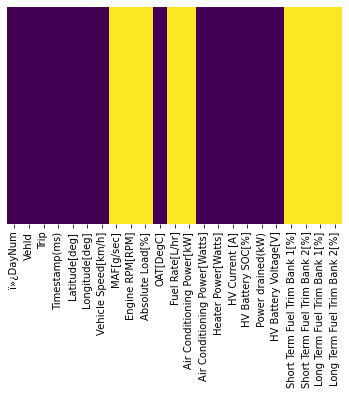

In [6]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [19]:
df

,ï»¿DayNum,VehId,Trip,Timestamp(ms),Latitude[deg],Longitude[deg],Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],Absolute Load[%],...,Air Conditioning Power[Watts],Heater Power[Watts],HV Current [A],HV Battery SOC[%],Power drained(kW),HV Battery Voltage[V],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
0,15.854020,10,1625,0,42.287548,-83.719066,36.130001,NaN,NaN,NaN,...,350,0,-59.0,61.707321,-21.88900,371.0,NaN,NaN,NaN,NaN
1,15.854020,10,1625,100,42.287548,-83.719066,40.919998,NaN,NaN,NaN,...,350,0,-59.0,61.707321,-21.88900,371.0,NaN,NaN,NaN,NaN
2,15.854020,10,1625,300,42.287548,-83.719066,40.919998,NaN,NaN,NaN,...,350,0,-58.5,61.707321,-21.70350,371.0,NaN,NaN,NaN,NaN
3,15.854020,10,1625,1100,42.287548,-83.719066,44.529999,NaN,NaN,NaN,...,350,0,-58.5,61.707321,-21.70350,371.0,NaN,NaN,NaN,NaN
4,15.854020,10,1625,1300,42.287548,-83.719066,44.529999,NaN,NaN,NaN,...,350,0,-50.0,61.707321,-18.55000,371.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66453,374.499878,10,3271,418400,42.302562,-83.704803,31.719999,NaN,NaN,NaN,...,400,500,21.5,96.341469,8.39575,390.5,NaN,NaN,NaN,NaN
66454,374.499878,10,3271,419200,42.302562,-83.704803,33.840000,NaN,NaN,NaN,...,400,500,21.5,96.341469,8.39575,390.5,NaN,NaN,NaN,NaN
66455,374.499878,10,3271,419500,42.302562,-83.704803,33.840000,NaN,NaN,NaN,...,400,500,-73.0,96.341469,-28.50650,390.5,NaN,NaN,NaN,NaN
66456,374.499878,10,3271,420300,42.302562,-83.704803,40.040001,NaN,NaN,NaN,...,400,500,-73.0,96.341469,-27.70350,379.5,NaN,NaN,NaN,NaN


In [8]:
group=df.groupby(['Trip', 'Latitude[deg]','Vehicle Speed[km/h]','Air Conditioning Power[Watts]','Heater Power[Watts]','Power drained(kW)', 'Longitude[deg]']).size().reset_index().rename(columns={0:'Nos'})
#Grouping and Renamed the 0 name of column to the count number
group

,Trip,Latitude[deg],Vehicle Speed[km/h],Air Conditioning Power[Watts],Heater Power[Watts],Power drained(kW),Longitude[deg],Nos
0,1625,42.281762,18.490000,0,0,-15.98000,-83.750967,1
1,1625,42.281762,24.019999,0,0,-21.99600,-83.750967,1
2,1625,42.281762,24.019999,0,0,-15.98000,-83.750967,1
3,1625,42.281762,29.389999,0,0,-26.88400,-83.750967,1
4,1625,42.281762,29.389999,0,0,-26.27625,-83.750967,1
...,...,...,...,...,...,...,...,...
61376,3271,42.302604,46.399998,400,500,15.22950,-83.705229,1
61377,3271,42.302604,52.660000,400,500,14.68775,-83.705229,1
61378,3271,42.302604,52.660000,400,500,15.03425,-83.705229,1
61379,3271,42.302604,52.660000,400,500,15.22950,-83.705229,1


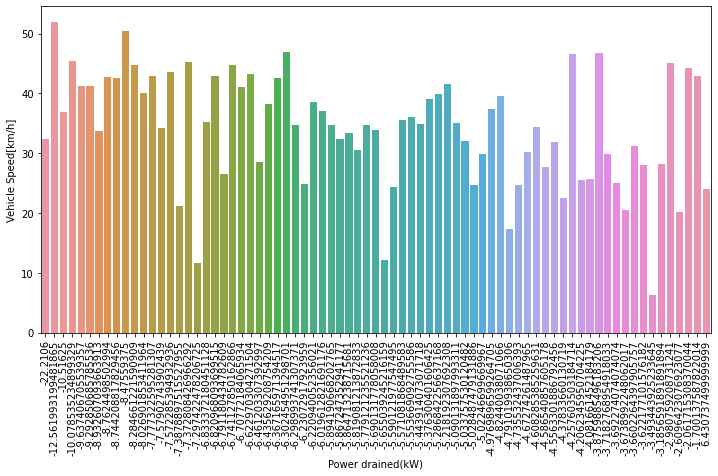

In [18]:

matplotlib.rcParams['figure.figsize']=(12,6)
ax=sns.barplot(x='Power drained(kW)', y= 'Vehicle Speed[km/h]', data=group_avg)
ax.tick_params(axis='x', rotation=90)

In [10]:
group_avg = (df.groupby(['Trip'], as_index=False).mean()
            .groupby('Trip')['Vehicle Speed[km/h]','Power drained(kW)'].mean())
group_avg

C:\Users\k_gag\AppData\Local\Temp/ipykernel_33088/699512077.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_avg = (df.groupby(['Trip'], as_index=False).mean()


,Vehicle Speed[km/h],Power drained(kW)
Trip,,
1625,34.659624,-6.298994
1629,24.685058,-5.028487
1638,30.563687,-5.819081
1644,35.523808,-5.571082
1761,24.784423,-6.230729
...,...,...
3149,17.399386,-4.791020
3150,29.884917,-5.022467
3161,42.860748,-1.700138


In [21]:
group_avg1 = (df.groupby(['Trip'], as_index=False).mean()
            .groupby('Trip')['Air Conditioning Power[Watts]','Heater Power[Watts]','Power drained(kW)'].mean())
group_avg1

C:\Users\k_gag\AppData\Local\Temp/ipykernel_33088/4228152224.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_avg1 = (df.groupby(['Trip'], as_index=False).mean()


,Air Conditioning Power[Watts],Heater Power[Watts],Power drained(kW)
Trip,,,
1625,313.490960,0.000000,-6.298994
1629,380.968280,199.499165,-5.028487
1638,504.046243,328.034682,-5.819081
1644,269.889323,18.717448,-5.571082
1761,647.585999,319.553410,-6.230729
...,...,...,...
3149,0.000000,0.000000,-4.791020
3150,0.000000,0.000000,-5.022467
3161,252.693208,0.000000,-1.700138
